In [2]:
import numpy as np
import math
from collections import Counter
from typing import NamedTuple
from pprint import pprint
import sklearn.metrics
import scipy.stats
import matplotlib.pyplot as plt


rng = np.random.default_rng()

Instructions: https://work.caltech.edu/homework/hw3.pdf

Answers: http://work.caltech.edu/homework/hw3_sol.pdf

# Generalization Error


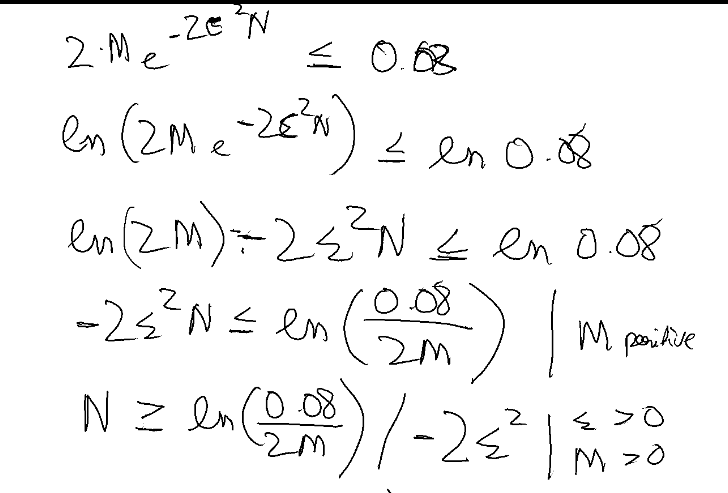

# 1.

M = 1
ε = 0.05

In [17]:
M = 1
ε = 0.05

N_at_least = np.log(0.03/(2*M))/(-2*(ε**2))
N_at_least

839.9410155759853

Answer: <font color="green">b</font>

# 2.

In [20]:
M = 10

N_at_least = np.log(0.03/(2*M))/(-2*(ε**2))
N_at_least

1300.4580341747942

Answer: <font color="green">c</font>

# 3.

In [22]:
M = 100

N_at_least = np.log(0.03/(2*M))/(-2*(ε**2))
N_at_least

1760.9750527736032

Answer: <font color="green">d</font>

# Break Point

# 4.

4 points:

No idea how to visualize this.

TODO: Let's get back to this after the next lesson, maybe we get some tools?
Update: Nope we did not.

Okay turns out the VC-Dimension of studied things like the Perceptron (linear separator) are well known, and it happens to be `(d+1)`.

(And then break point would be d<sub>VC</sub> + 1.

In the first version of the homework, I actually went and figured it out computationally by generating all possible dichotomies and checking if 3d-perceptron converged for all of them ;) but I'm too lazy to do that here.

# Growth Function
# 5.

Let's plot these for a few values of n.

Here's the max growth function:

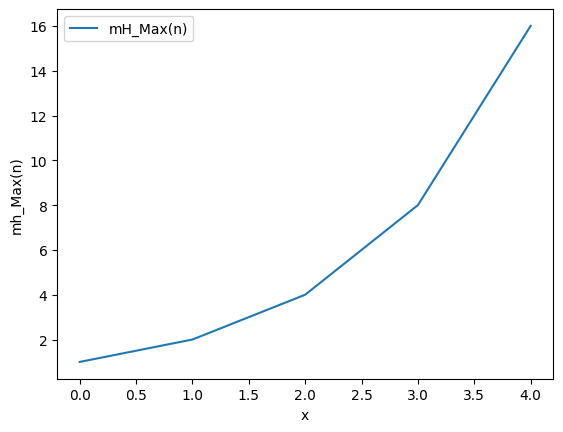

In [8]:
x = np.linspace(0, 4, num=5)
y = 2 ** x

plt.plot(x, y, label='mH_Max(N)')
plt.xlabel('x')
plt.ylabel('mh_Max(N)')
plt.legend()
plt.show()

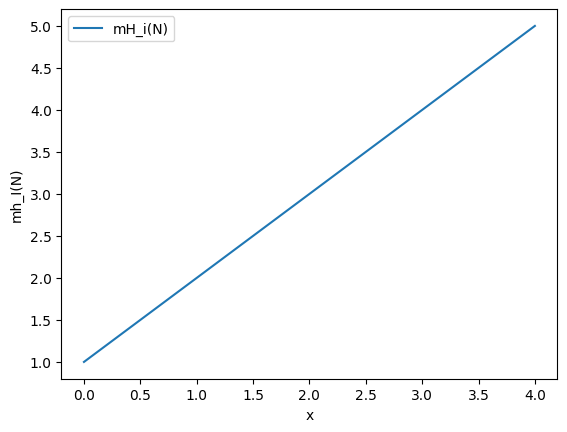

In [9]:
y = 1 + x
plt.plot(x, y, label='mH_i(N)')
plt.xlabel('x')
plt.ylabel('mh_I(N)')
plt.legend()
plt.show()

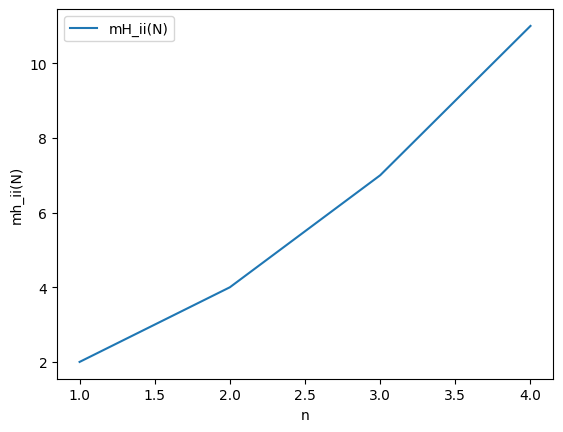

In [20]:
n = np.arange(1, 5)
y = 1 + n + np.vectorize(math.comb)(n, 2)
plt.plot(n, y, label='mH_ii(N)')
plt.xlabel('n')
plt.ylabel('mh_ii(N)')
plt.legend()
plt.show()

That also looks good. Let's look at iii:

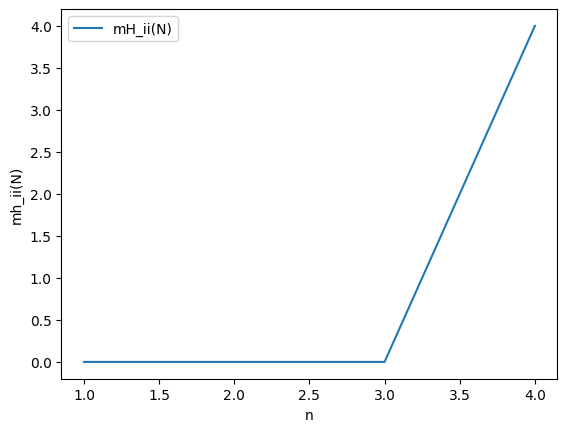

In [48]:
def iii(n):
    assert type(n) == np.int64 or int
    upper_bound = np.floor(np.sqrt(n)).astype(int)
    return sum([math.comb(n, i) for i in range(1, upper_bound)])

plt.plot(n, np.vectorize(iii)(n), label='mH_ii(N)')
plt.xlabel('n')
plt.ylabel('mh_ii(N)')
plt.legend()
plt.show()

That does not look like a viable growth function, since the number of possible dichotomies on n <= 3 can't be 0 and then suddenly jump up.
Since (iii) is a no but (ii) is a yes,

My answer: <font color="green">b</font>

# Fun with Intervals

# 6.

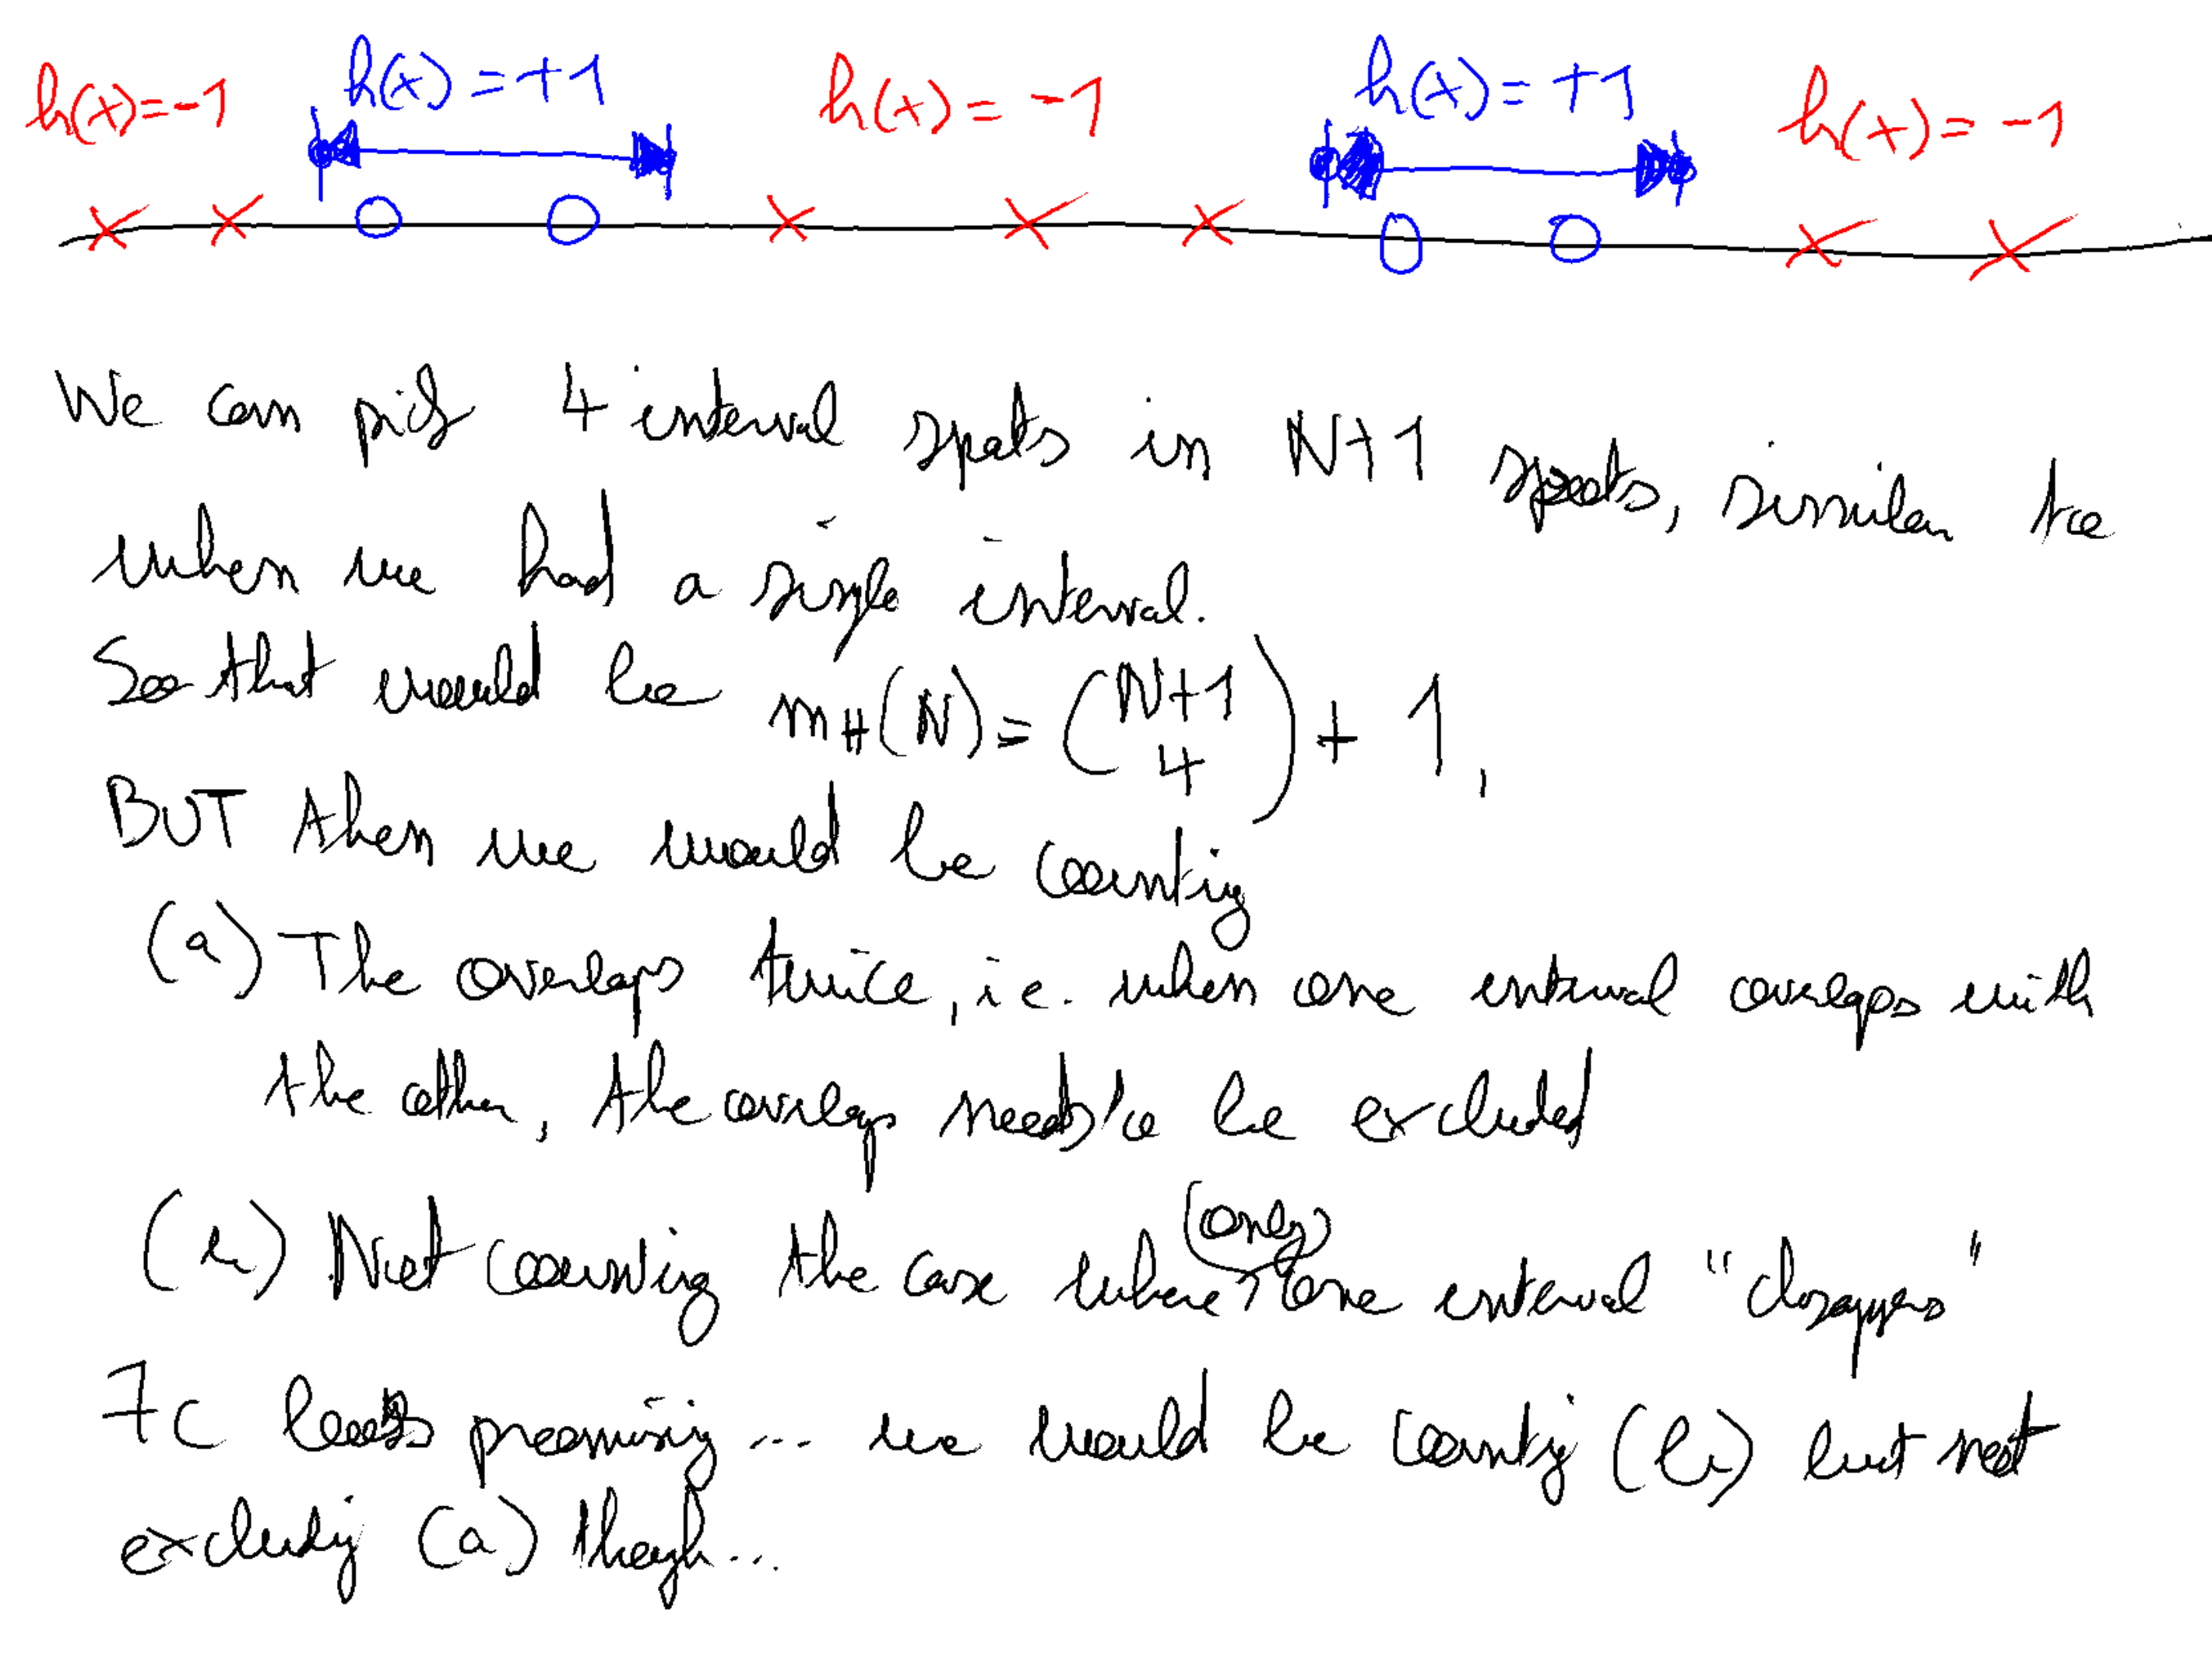

Hmm okay, let's get the smallest break point first and then see if that helps us pick either of the answers in 7.

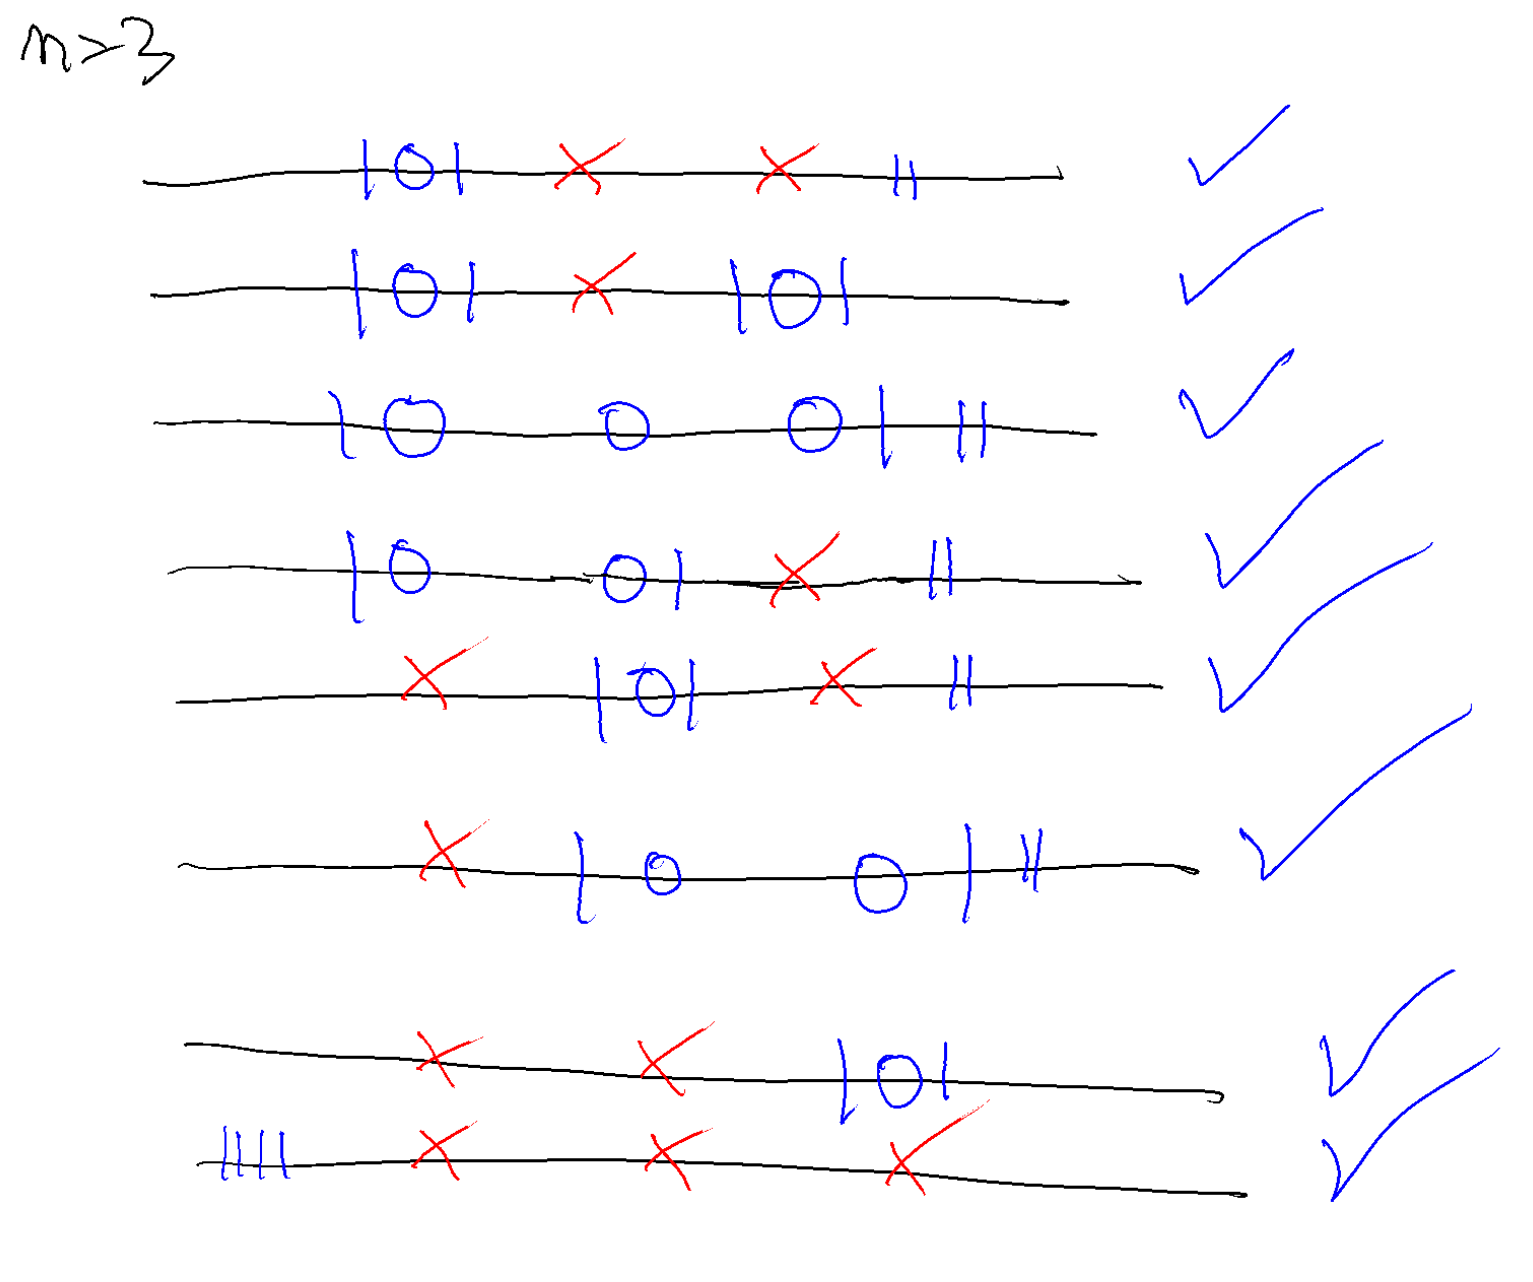

That's clearly shattered.

We can definitely not shatter n=5, since there's this guy:

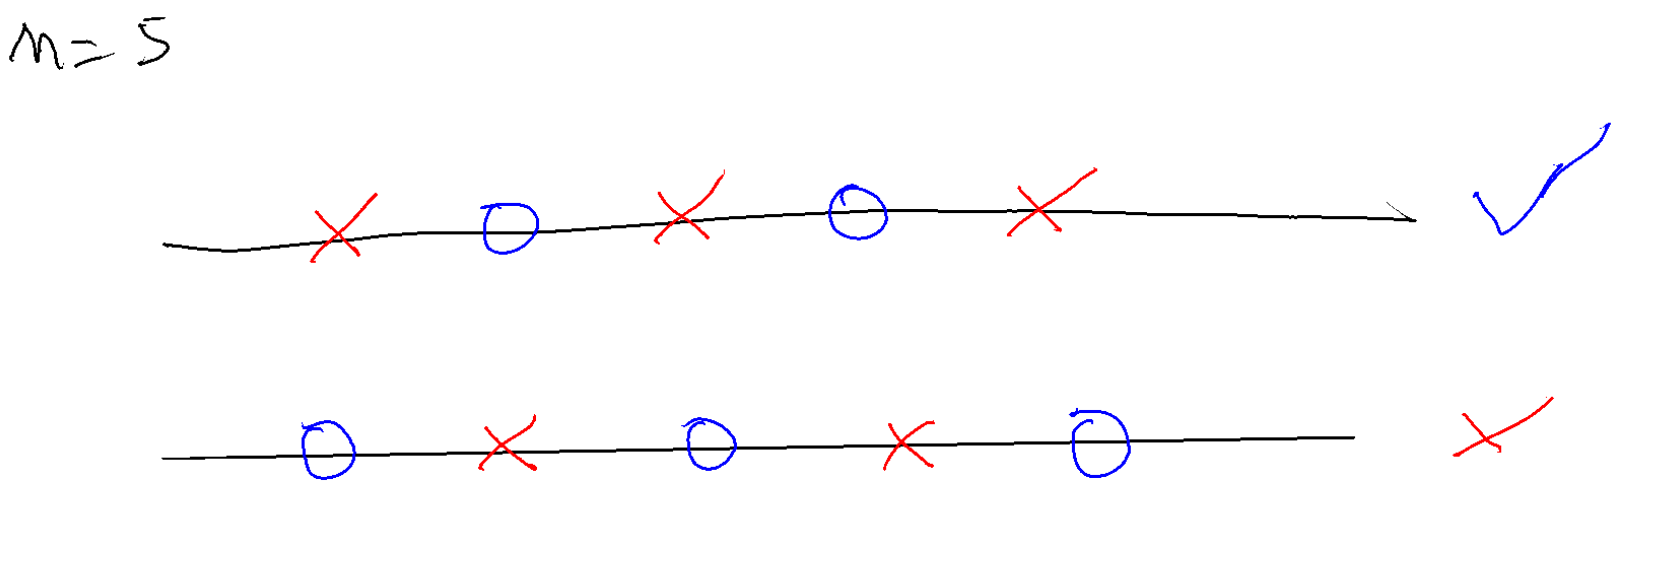

Can we get all 16 on n=4? I'm thinking yes, but let's verify:

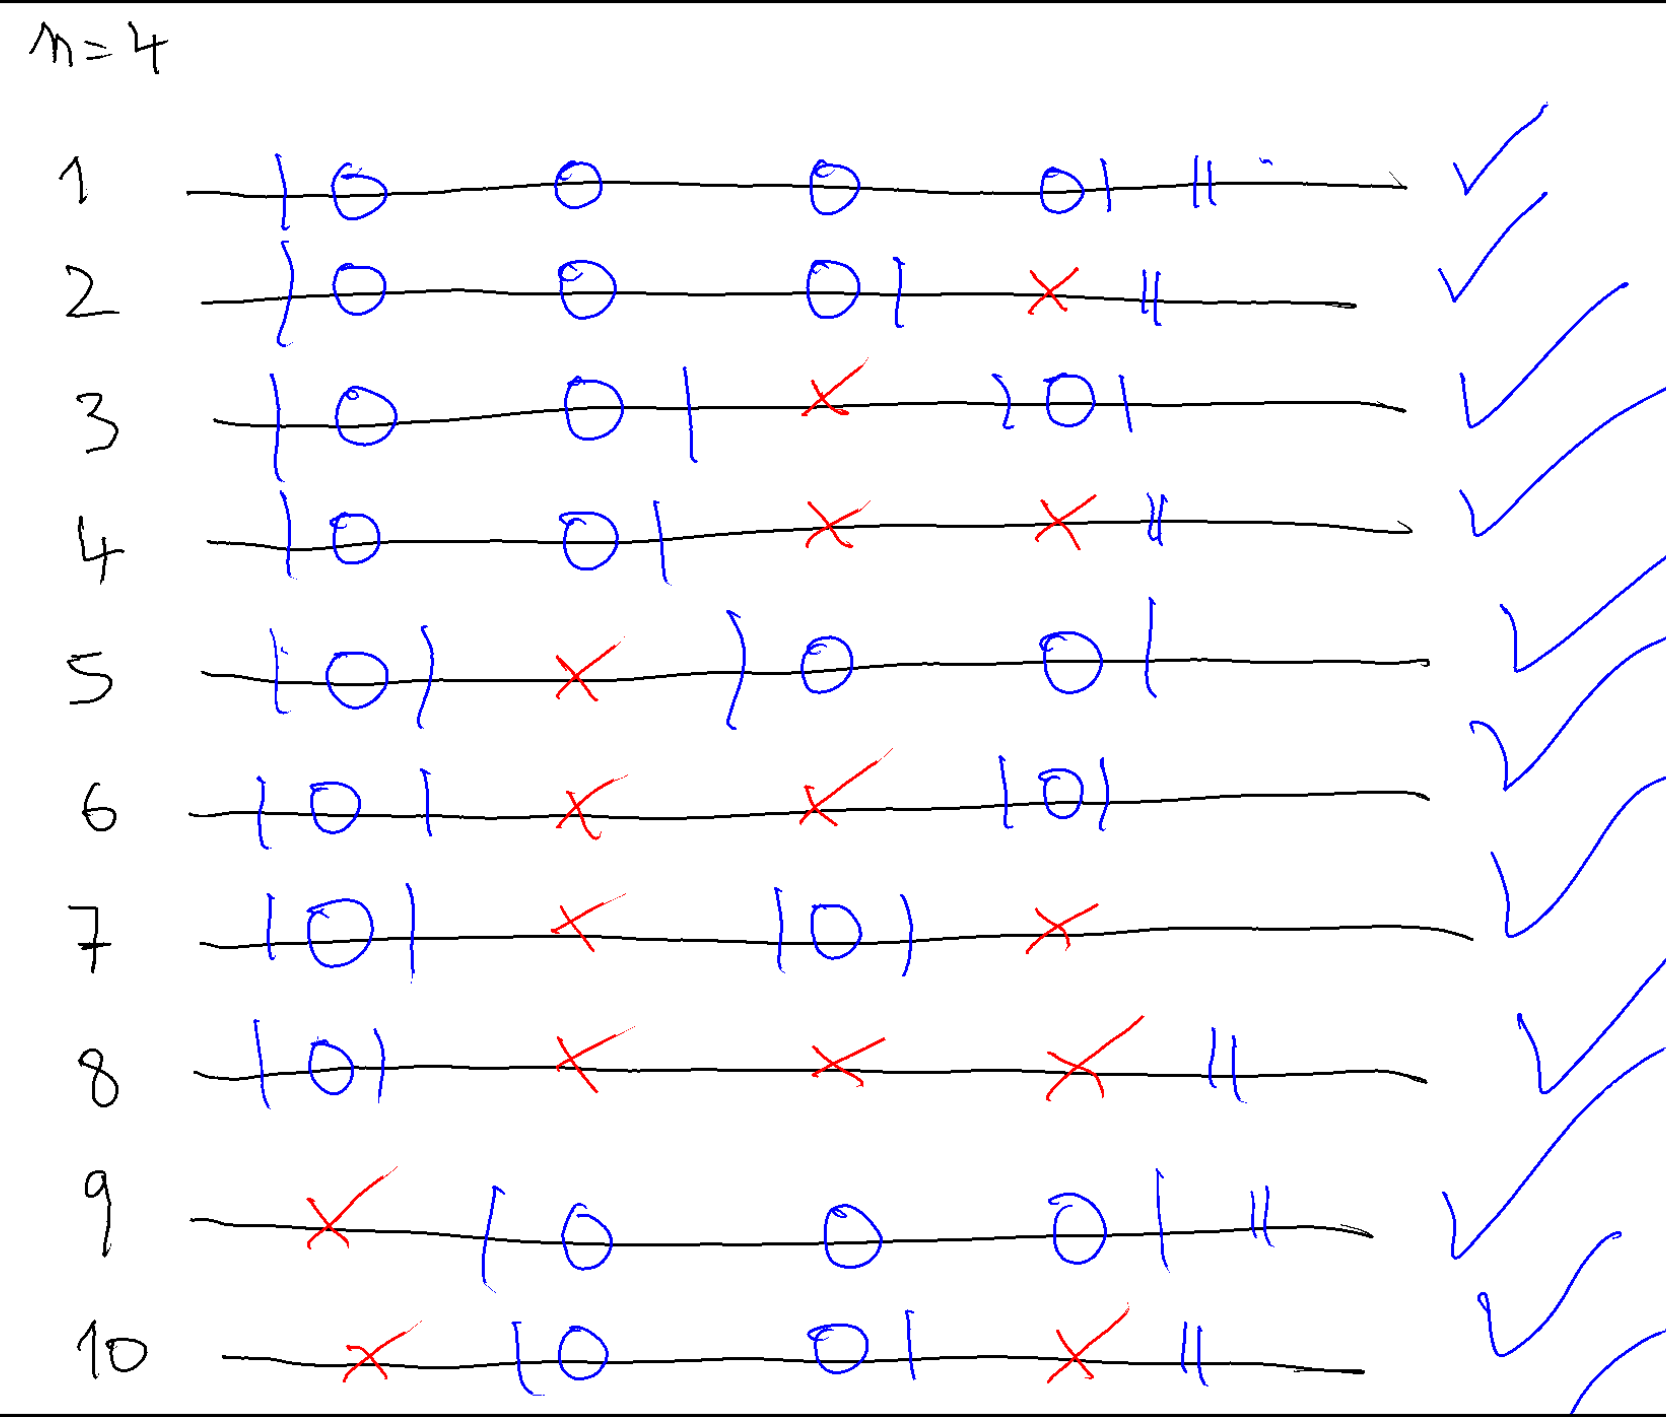
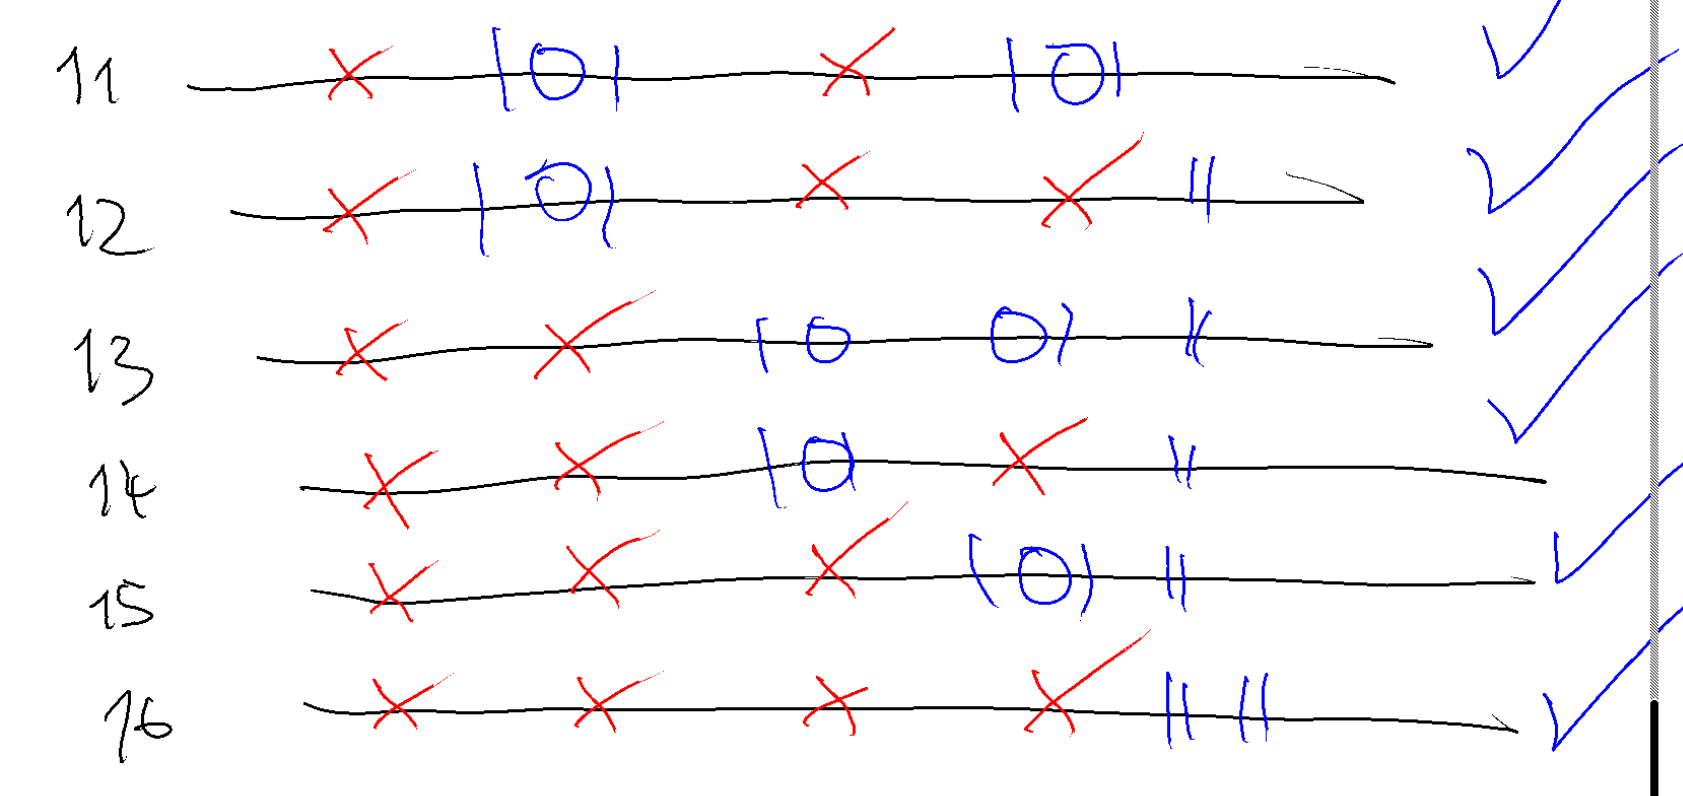

Yes, we can! 

So the answer is <font color="green">[c]</font> (breakpoint 5)

# 7. 

Since none of them look super plausible at first glance (see above), let's plot them and see which ones would even qualify.

We know that

`m_H(1)` should be 2

`m_H(2)` should be 4

`m_H(3)` should be 8

`m_H(4)` should be 16

`m_H(5)` should be <32

In [60]:
def test_growth_function(m_H):
    assert callable(m_H)
    assert m_H(1) == 2, "fails at 1"
    assert m_H(2) == 4, "fails at 2"
    assert m_H(3) == 8, "fails at 3"
    assert m_H(4) == 16, "fails at 4"
    assert m_H(5) < 32, "too large at 5"

print("Testing a")
test_growth_function(lambda n: math.comb(n+1, 4))

Testing a


AssertionError: fails at 1

In [61]:
print("Testing b")
test_growth_function(lambda n: math.comb(n+1, 2) + 1)

Testing b


AssertionError: fails at 3

In [62]:
print("Testing c")
test_growth_function(lambda n: math.comb(n+1, 4) + math.comb(n+1, 2) + 1)

Testing c


So c looks plausible, as we said above, but I'm not yet positive why (c) doesn't have too many candidates, i.e. it's too loose of a bound 🤔

In [63]:
print("Testing d")
test_growth_function(lambda n: math.comb(n+1, 4) + math.comb(n+1, 3) + math.comb(n+1, 2) + math.comb(n+1, 1) + 1)

Testing d


AssertionError: fails at 1

I'm going to say <font color="green">c</font>, but it could also be e.

# 8.

Well, for 1 interval we had breakpoint = 3, for 2 intervals we have breakpoint = 5.

So it can only be <font color="green">[d] 2M + 1</font>

# Convex Sets: The Triangle

# 9.

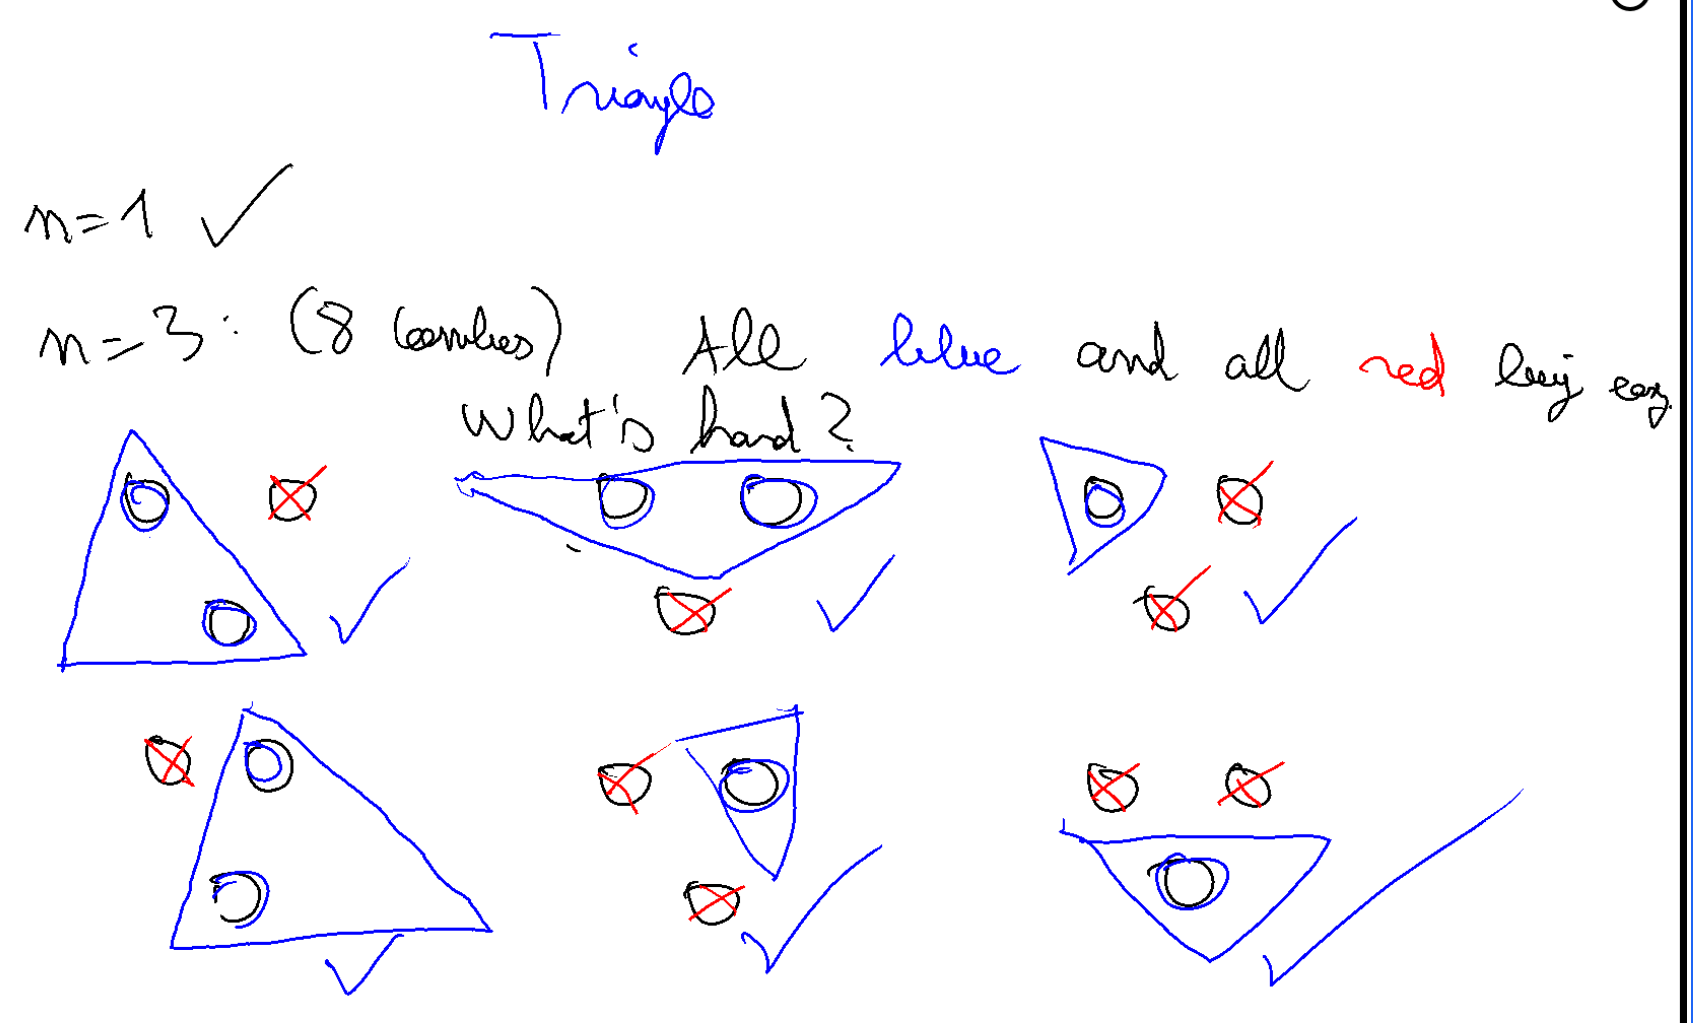

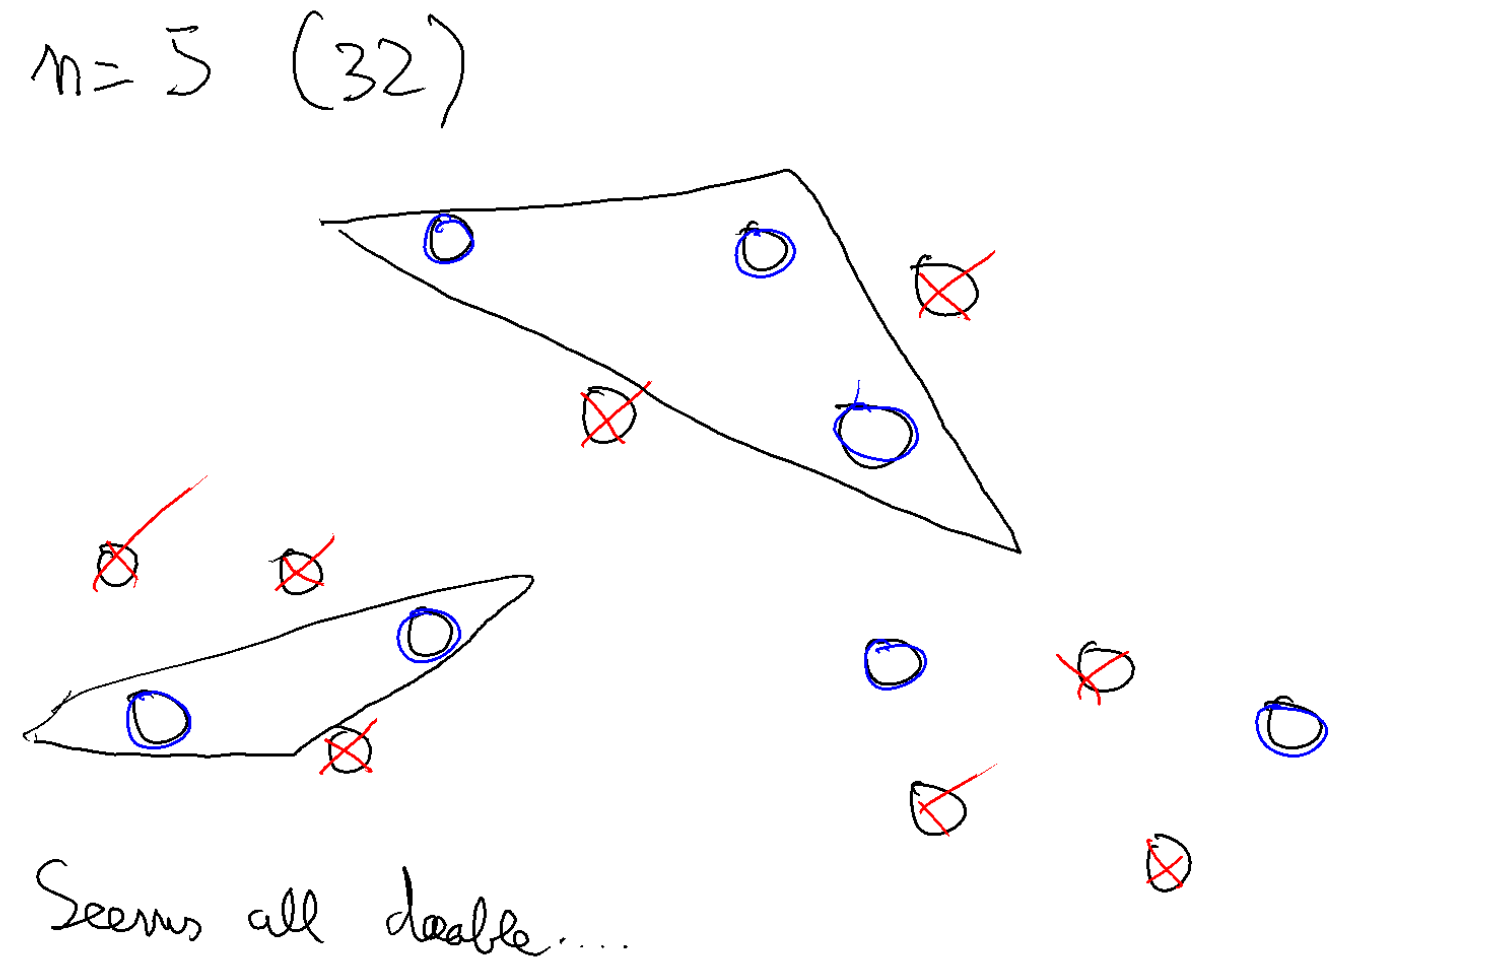

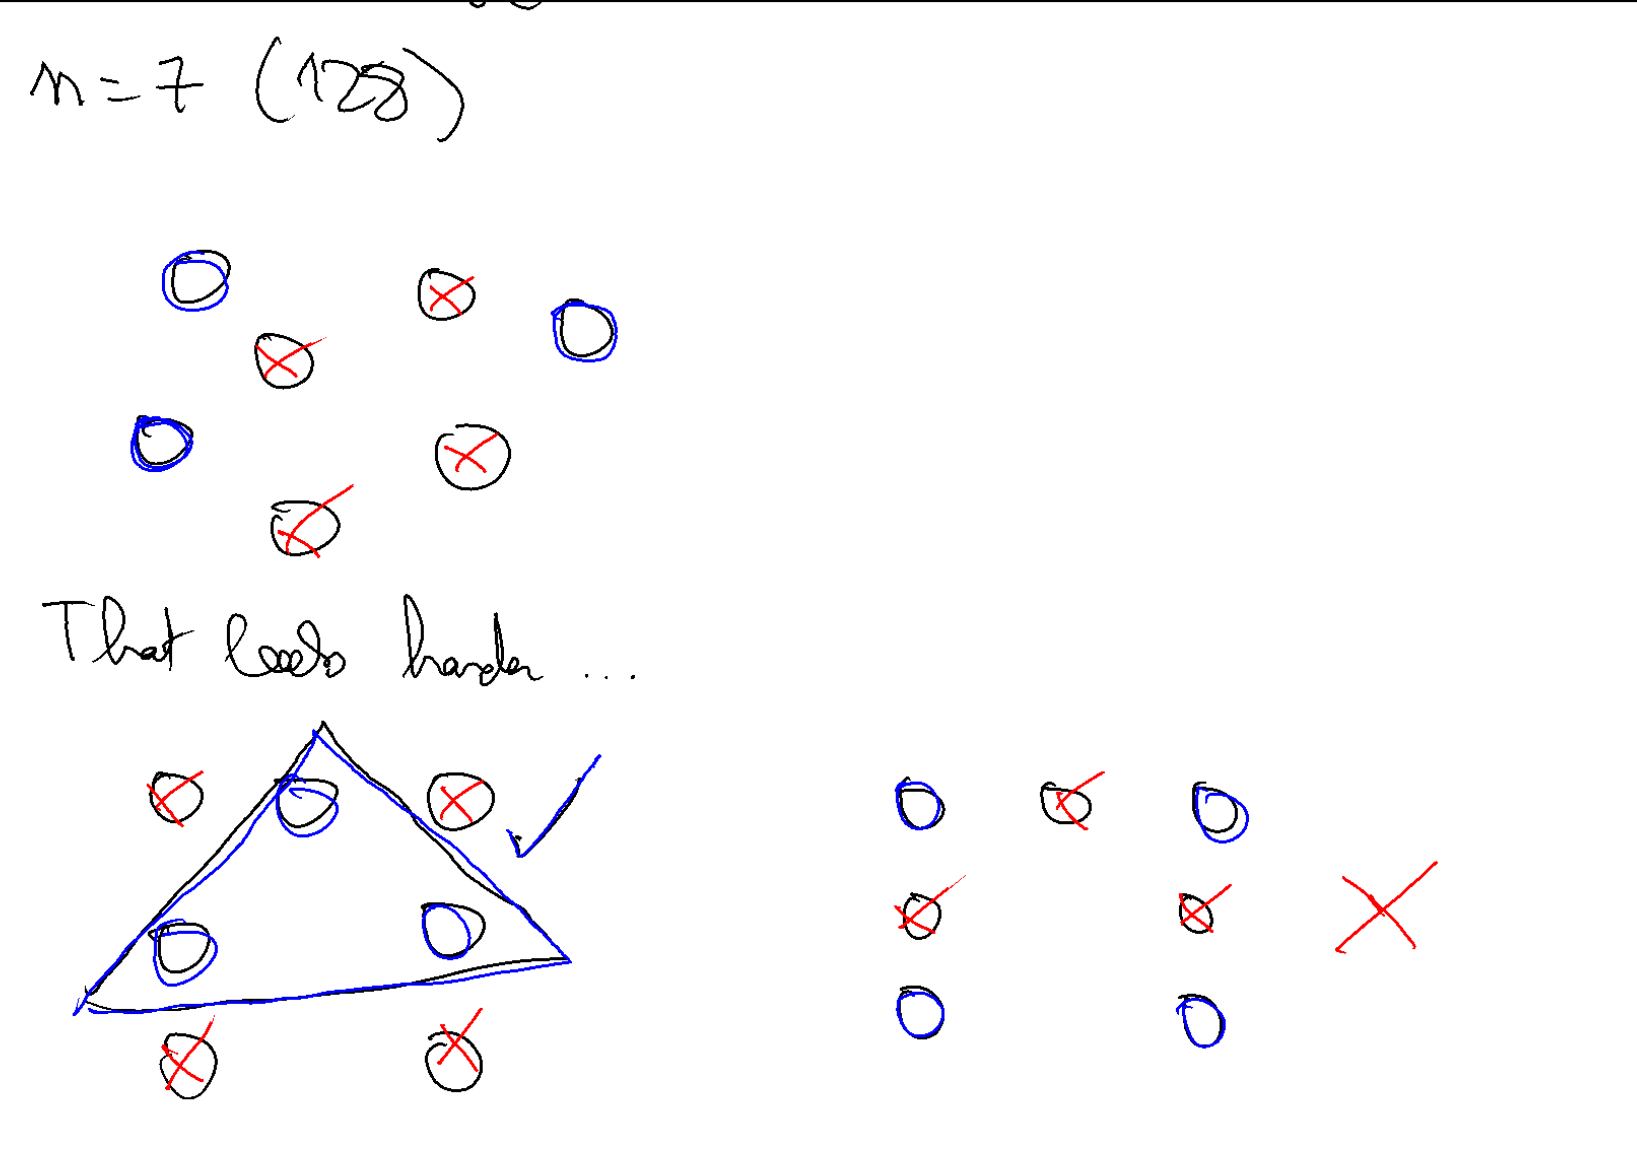

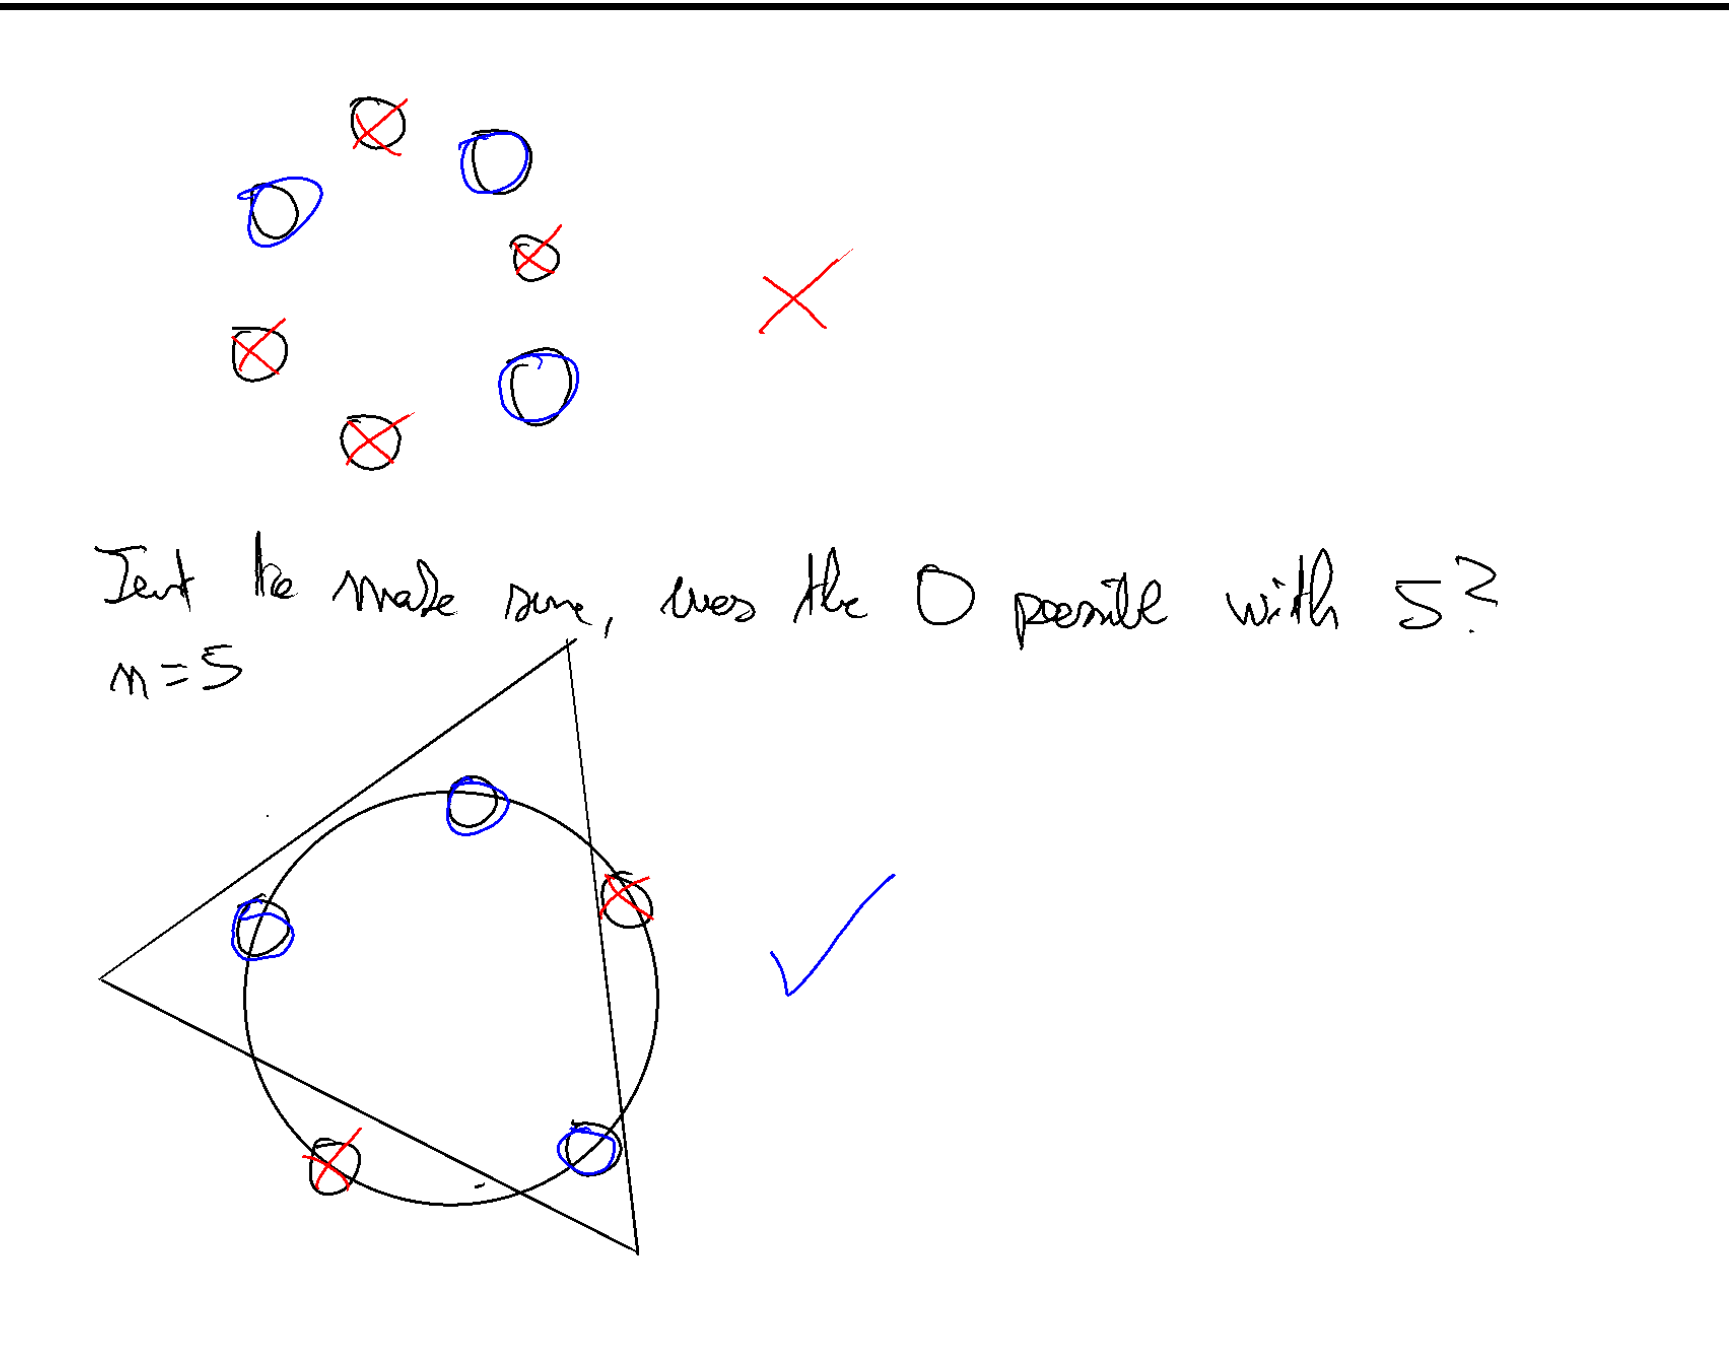

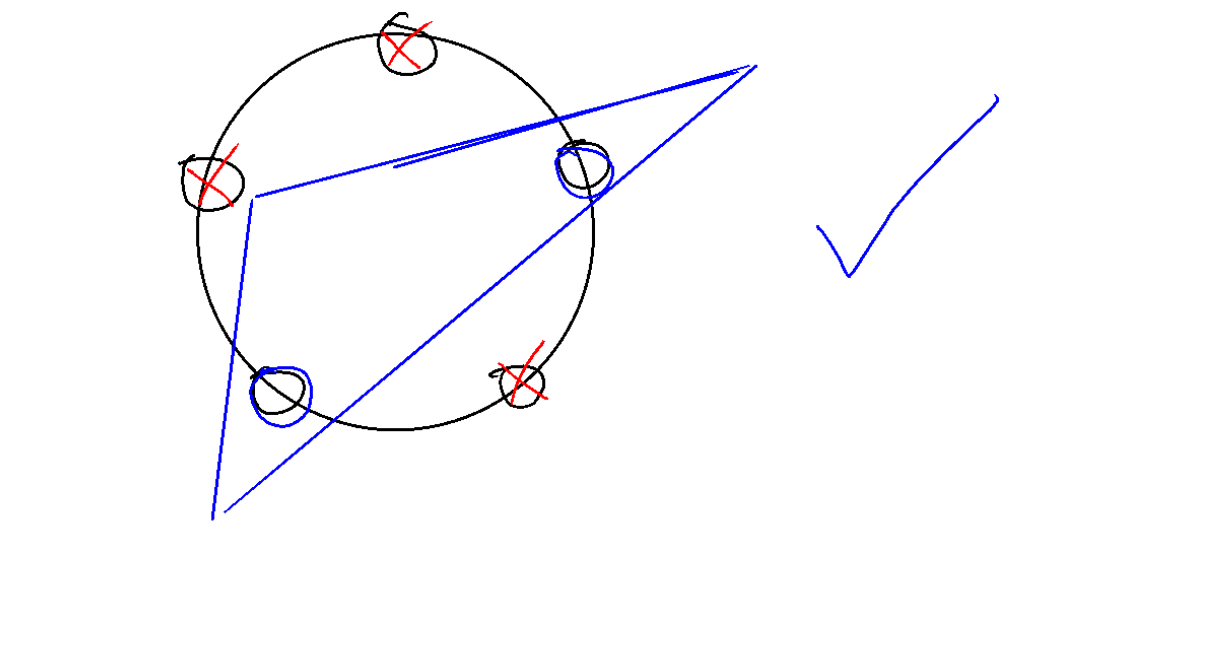

My answer: <font color="red">[c]</font> 5

Turns out their must be a way to cleverly arrange 7 points after all : )

What about a convex shape, like a hexagon with 7 edges?

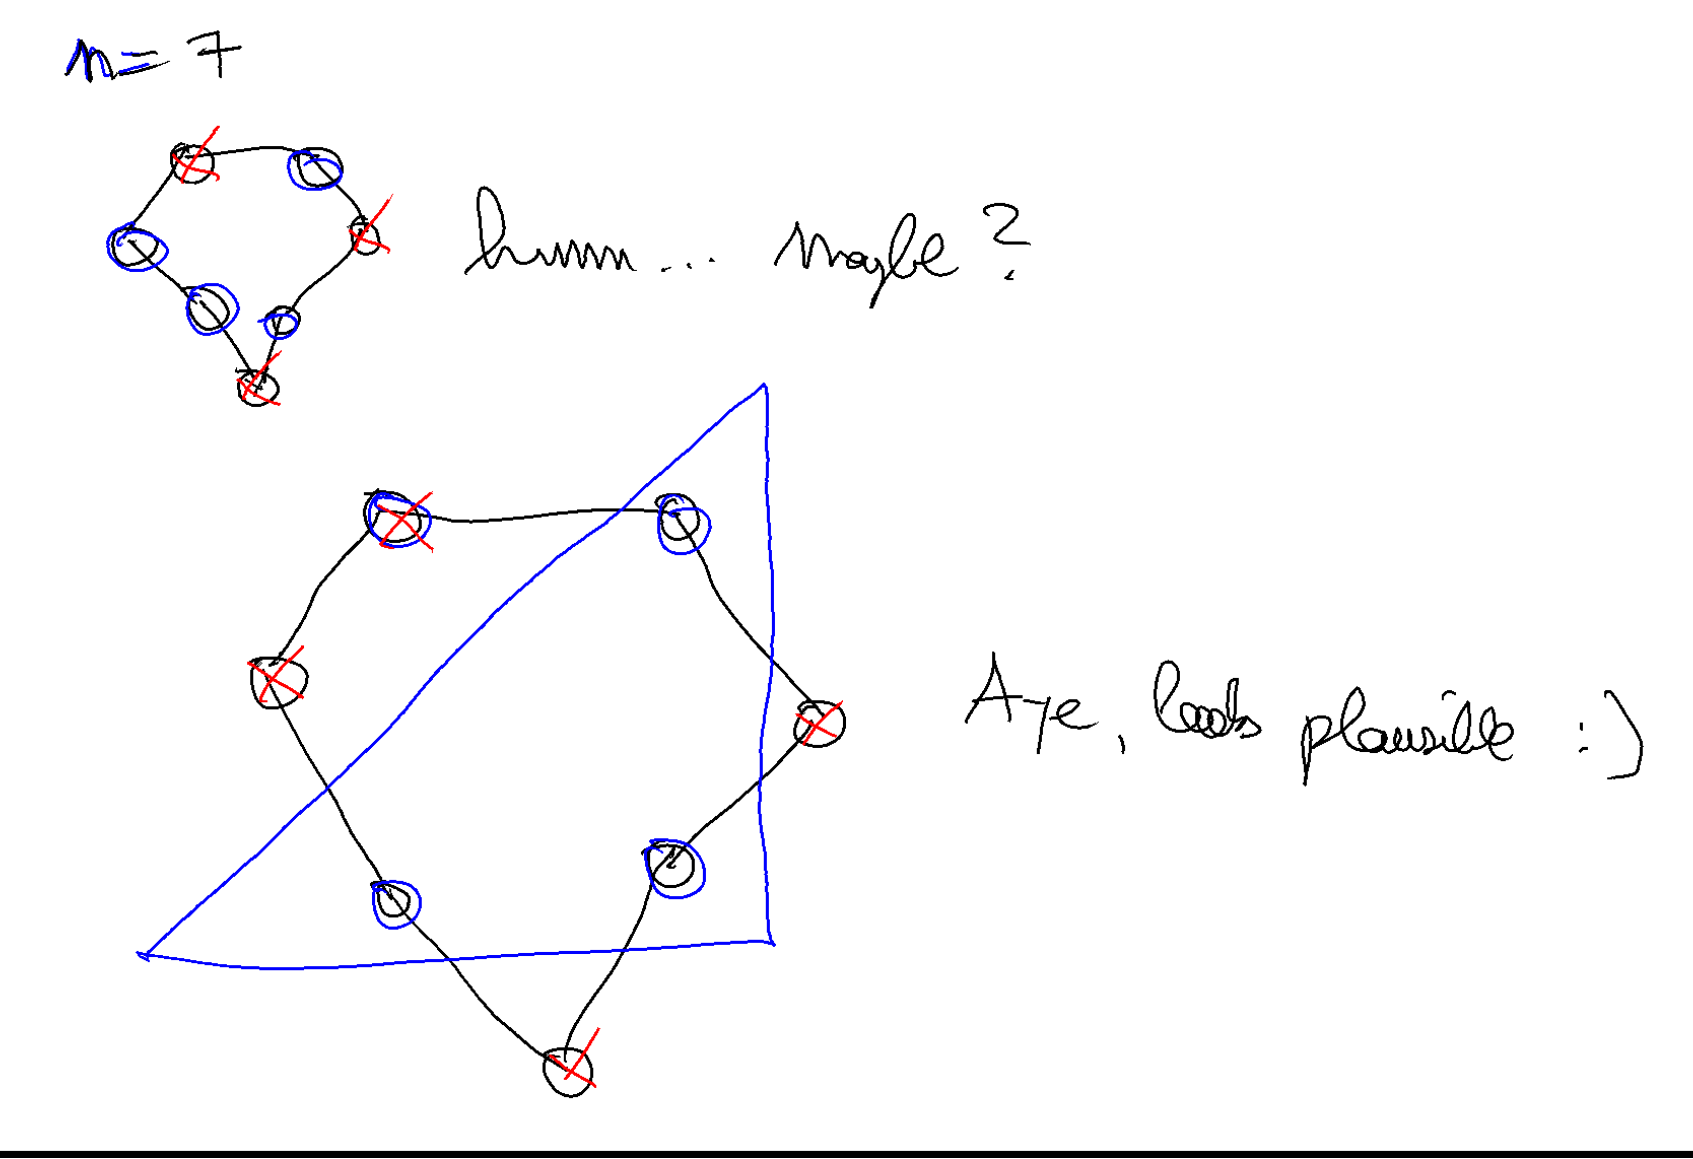

Okay, guess it's <font color="green">d</font> 7!

Turns out this shape is called a heptagon

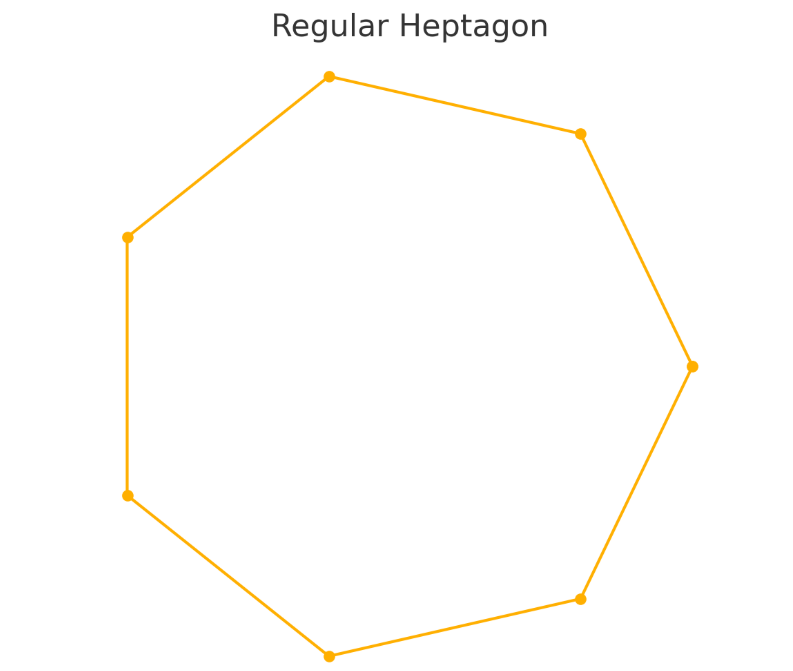

and it could be regularly drawn 😂

# Non-Convex Sets: Concentric Circles

Tedious work again -.-

This time I would probably go and try to find a break point, then apply the B(N, k) bound to bound the possible growth function answers.
